In [1]:
import os
import sys

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import pyEDM

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

import warnings
warnings.filterwarnings('ignore')

## References
### Empirical dynamic modeling for beginners

https://doi.org/10.1007/s11284-017-1469-9

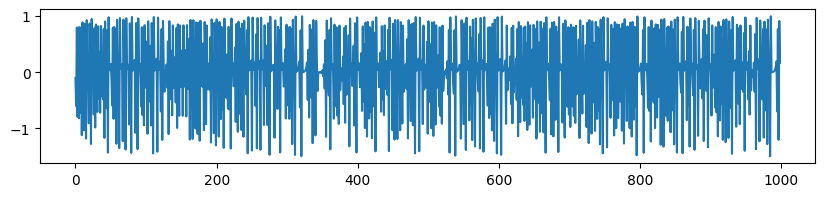

In [11]:
data = pd.read_csv(os.getcwd()+'/jpyEDM-master/data/TentMap.csv')
plt.figure(figsize=(10,2))
plt.plot(data['TentMap'])

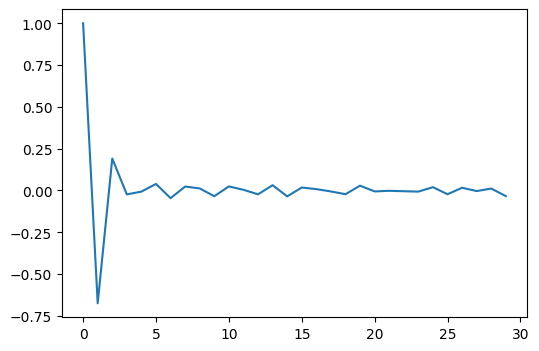

In [16]:
ac = sm.tsa.acf(data['TentMap'])
plt.figure(figsize=(6,4))
plt.plot(ac)

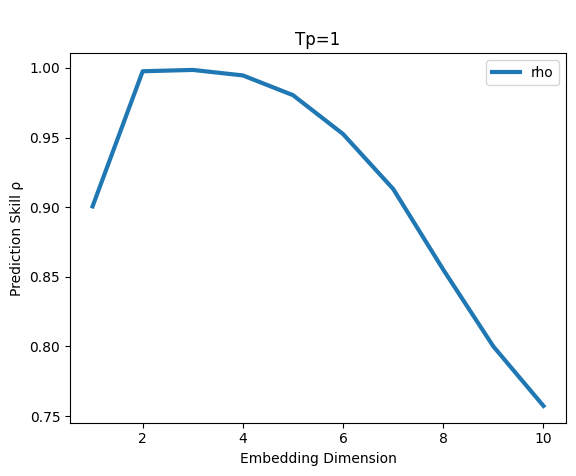

In [83]:
out_E =pyEDM.EmbedDimension(dataFrame = data, lib="1 500",pred='501 999', columns='TentMap')

In [38]:
E_star = out_E['E'][np.argmax(out_E['rho'])]
E_star = int(E_star)
print(E_star)

3


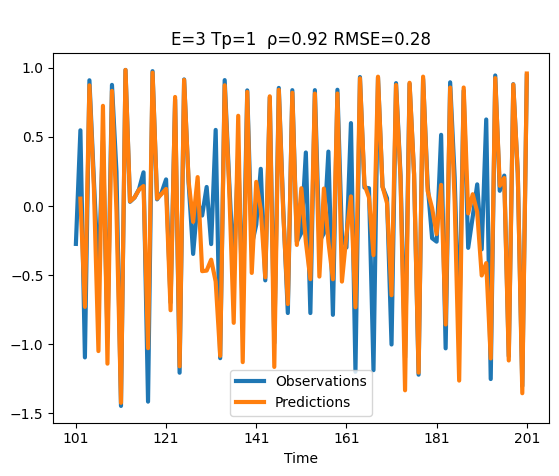

,Time,Observations,Predictions,Pred_Variance
0,101,-0.27407,NaN,NaN
1,102,0.54787,0.053413,3.725397e-01
2,103,-1.09519,-0.729757,1.763216e-02
3,104,0.90979,0.873111,2.552687e-03
4,105,0.17961,0.125063,1.131526e-02
...,...,...,...,...
96,197,-1.08640,-1.117433,1.198081e-01
97,198,0.88162,0.879260,3.076098e-08
98,199,0.23569,0.240013,4.274167e-05
99,200,-1.30285,-1.354384,4.622345e-03


In [40]:
pyEDM.Simplex(dataFrame = data, lib="1 100",pred='101 200', columns='TentMap', E=E_star, tau=-1, Tp=1, showPlot=True)

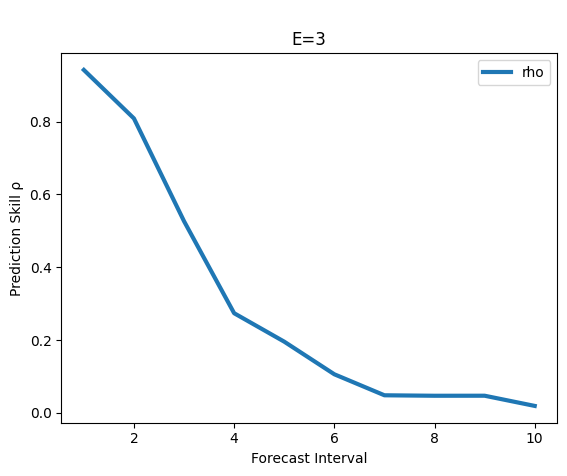

,Tp,rho
0,1.0,0.942229
1,2.0,0.808921
2,3.0,0.526621
3,4.0,0.273761
4,5.0,0.195587
5,6.0,0.105949
6,7.0,0.048238
7,8.0,0.046933
8,9.0,0.047035
9,10.0,0.019006


In [42]:
pyEDM.PredictInterval(dataFrame = data, lib="1 100",pred='201 500', columns='TentMap', E=E_star)
# auto correlation drops at 1 time step, but manifold can predict longer time steps

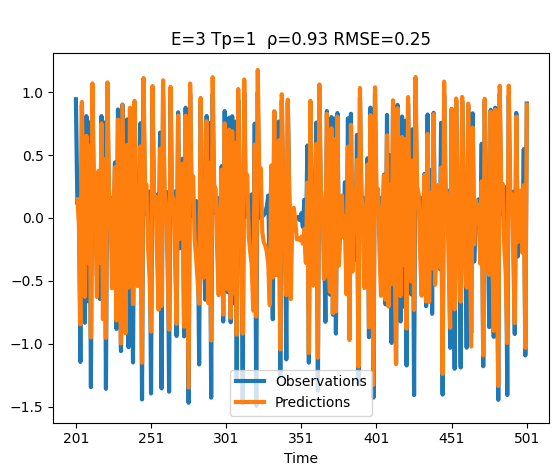

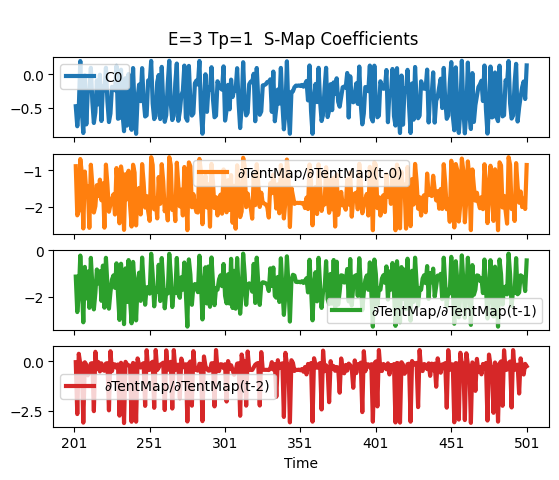

{'predictions':     Time  Observations  Predictions  Pred_Variance
 0    201       0.94361          NaN            NaN
 1    202       0.11227     0.147737       0.319130
 2    203       0.22444    -0.053068       0.450439
 3    204      -1.14514    -0.846020       0.783501
 4    205       0.89844     0.922158       0.443770
 ..   ...           ...          ...            ...
 296  497       0.13691     0.218436       0.539606
 297  498      -0.27368    -0.276010       0.470003
 298  499       0.54708     0.259261       0.571898
 299  500      -1.09361    -1.033092       0.675922
 300  501       0.90944     0.899657       0.452573
 
 [301 rows x 4 columns],
 'coefficients':     Time        C0  ∂TentMap/∂TentMap(t-0)  ∂TentMap/∂TentMap(t-1)  \
 0    201       NaN                     NaN                     NaN   
 1    202 -0.476686               -0.883662               -1.128701   
 2    203 -0.777255               -2.229826               -2.651525   
 3    204 -0.510339               

In [47]:
pyEDM.SMap(dataFrame = data, lib="1 200",pred='201 500', columns='TentMap', E=E_star, theta =3, showPlot=True)

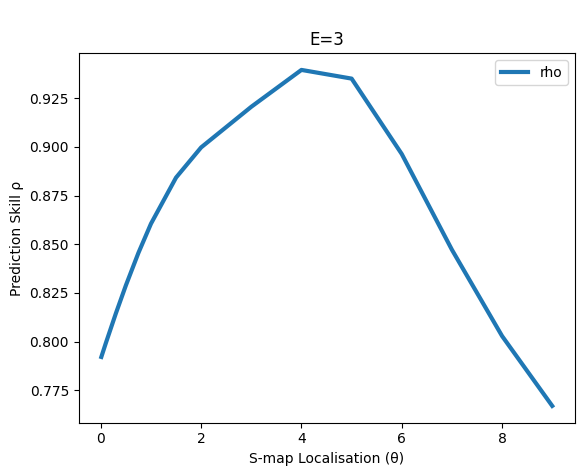

,Theta,rho
0,0.01,0.792103
1,0.10,0.799231
2,0.30,0.814487
3,0.50,0.828893
4,0.75,0.845577
5,1.00,0.860546
6,1.50,0.884241
7,2.00,0.899730
8,3.00,0.920595
9,4.00,0.939521


In [46]:
pyEDM.PredictNonlinear(dataFrame = data, lib = '1 100', pred = '201 500', columns='TentMap', E=E_star)

In [103]:
pyEDM.Embed(dataFrame = data, E=E_star, tau=-1, columns='TentMap')

,TentMap(t-0),TentMap(t-1),TentMap(t-2)
0,-0.09920,NaN,NaN
1,-0.60130,-0.09920,NaN
2,0.79980,-0.60130,-0.09920
3,-0.79441,0.79980,-0.60130
4,0.79800,-0.79441,0.79980
...,...,...,...
994,-0.69848,0.19255,0.09632
995,0.77053,-0.69848,0.19255
996,-1.20288,0.77053,-0.69848
997,0.91498,-1.20288,0.77053


In [51]:
data_2 = pd.read_csv(os.getcwd()+'/jpyEDM-master/data/Sardine_Anchovy_SST.csv')

In [52]:
data_2

,year,anchovy,sardine,sio_sst,np_sst
0,1929,-0.007599,1.770090,-0.352393,-0.347846
1,1930,-0.009602,-1.151520,0.001149,0.328734
2,1931,-0.008444,-1.420680,1.068220,1.610270
3,1932,-0.008354,0.112222,0.531857,1.265340
4,1933,-0.007750,1.515550,-0.552058,0.040046
...,...,...,...,...,...
73,2002,-0.741992,0.138018,0.658063,-1.186420
74,2003,-0.157825,-0.360649,0.634573,-1.342620
75,2004,0.249897,0.189861,1.219800,-0.530206
76,2005,0.213121,-0.130771,1.749450,-0.757965


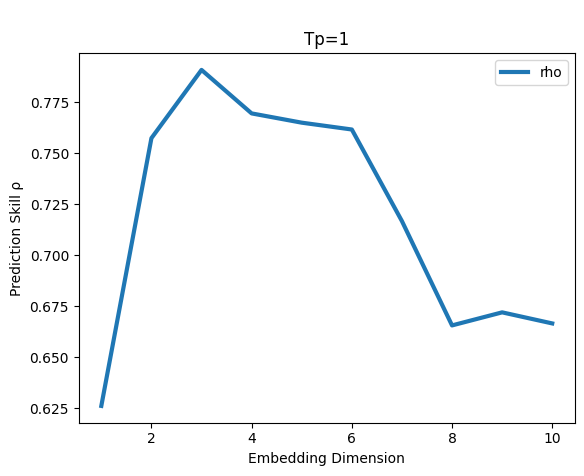

,E,rho
0,1.0,0.626142
1,2.0,0.757497
2,3.0,0.790982
3,4.0,0.769651
4,5.0,0.765103
5,6.0,0.761751
6,7.0,0.716812
7,8.0,0.665638
8,9.0,0.672046
9,10.0,0.666614


In [87]:
pyEDM.EmbedDimension(dataFrame = data_2, lib="1 50",pred='51 77', columns='np_sst')

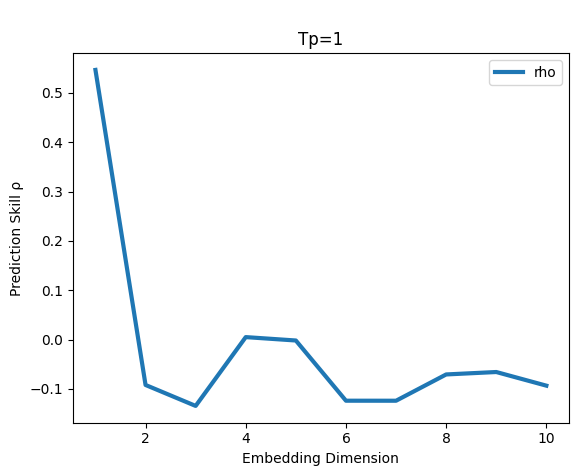

,E,rho
0,1.0,0.546423
1,2.0,-0.092071
2,3.0,-0.134533
3,4.0,0.004924
4,5.0,-0.001955
5,6.0,-0.123966
6,7.0,-0.124010
7,8.0,-0.070746
8,9.0,-0.065822
9,10.0,-0.093472


In [86]:
pyEDM.EmbedDimension(dataFrame = data_2, lib="1 50",pred='51 77', columns='anchovy')

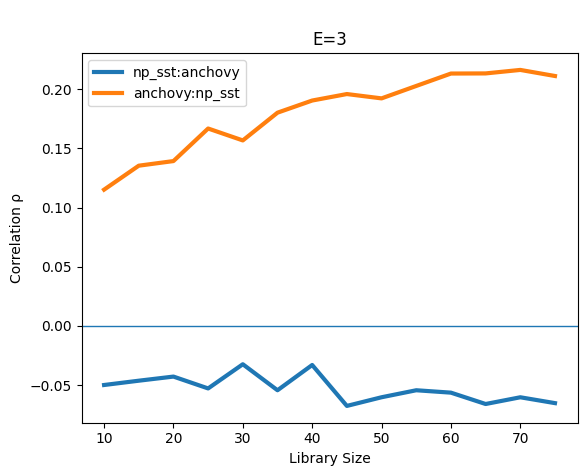

In [116]:
results = pyEDM.CCM(dataFrame = data_2, 
        E =3, columns = 'np_sst', target = 'anchovy', 
        includeData=True, parameterList=True,
        libSizes = "10 75 5", random=True, sample =100,  showPlot = True) 

# Target -> Columns


In [118]:
time_delay = pyEDM.MakeBlock(dataFrame = data, E=E_star, tau=-1, columnNames=['TentMap'], deletePartial=False)

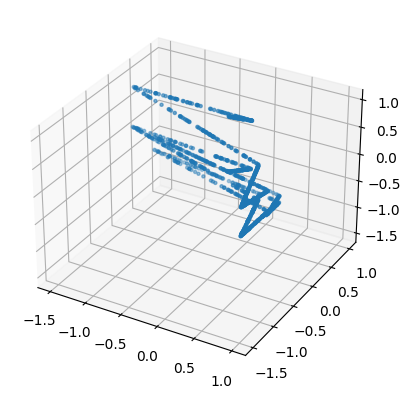

In [123]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(time_delay['TentMap(t-0)'], time_delay['TentMap(t-1)'], time_delay['TentMap(t-2)'], s=5)